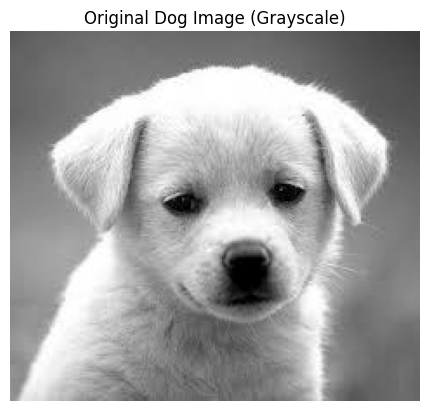

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
dog = cv2.imread("Dog.jpeg")

# Convert image to grayscale (for simplicity)
dog_gray = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

# Display the original image
plt.imshow(dog_gray, cmap='gray')
plt.title("Original Dog Image (Grayscale)")
plt.axis("off")
plt.show()


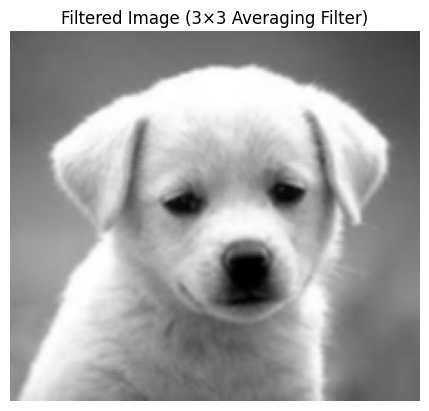

In [ ]:
# Define 3×3 Averaging filter mask
avg_filter = np.ones((3,3), dtype=np.float32) / 9

# Apply convolution using cv2.filter2D
dog_avg_filtered = cv2.filter2D(dog_gray, -1, avg_filter)

# Display the filtered image
plt.imshow(dog_avg_filtered, cmap='gray')
plt.title("Filtered Image (3×3 Averaging Filter)")
plt.axis("off")
plt.show()

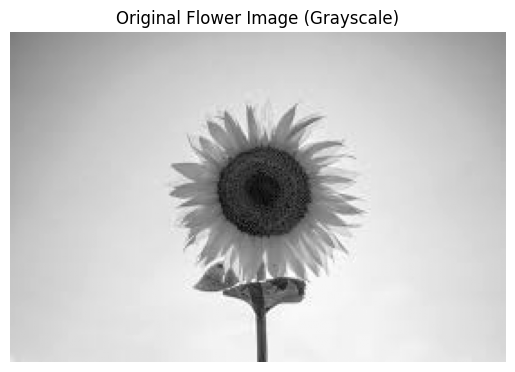

In [ ]:
# Load the flower image
flower = cv2.imread("Flower.jpeg")
flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

# Display the original image
plt.imshow(flower_gray, cmap='gray')
plt.title("Original Flower Image (Grayscale)")
plt.axis("off")
plt.show()


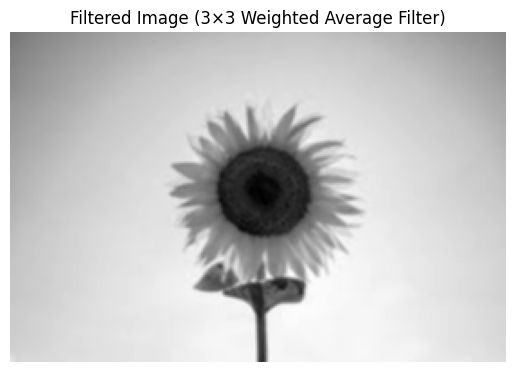

In [ ]:
# Define a 3×3 Weighted Average Filter
weighted_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32) / 16

# Apply convolution
flower_weighted_filtered = cv2.filter2D(flower_gray, -1, weighted_filter)

# Display the filtered image
plt.imshow(flower_weighted_filtered, cmap='gray')
plt.title("Filtered Image (3×3 Weighted Average Filter)")
plt.axis("off")
plt.show()


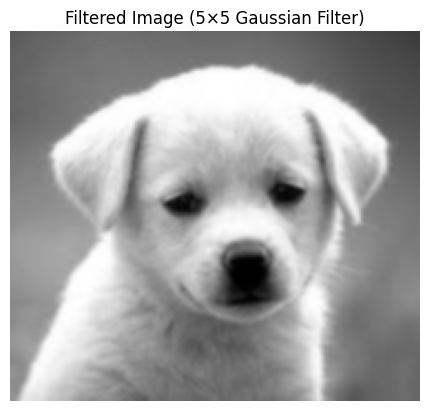

In [ ]:
# Define a 5×5 Gaussian Filter
gaussian_filter = cv2.getGaussianKernel(5, sigma=1)  # Generate 1D Gaussian kernel
gaussian_filter = gaussian_filter @ gaussian_filter.T  # Convert to 2D

# Apply convolution
dog_gaussian_filtered = cv2.filter2D(dog_gray, -1, gaussian_filter)

# Display the filtered image
plt.imshow(dog_gaussian_filtered, cmap='gray')
plt.title("Filtered Image (5×5 Gaussian Filter)")
plt.axis("off")
plt.show()


<ipython-input-8-d9537ef64531>:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(low_contrast_img.ravel(), 256, [0, 256])


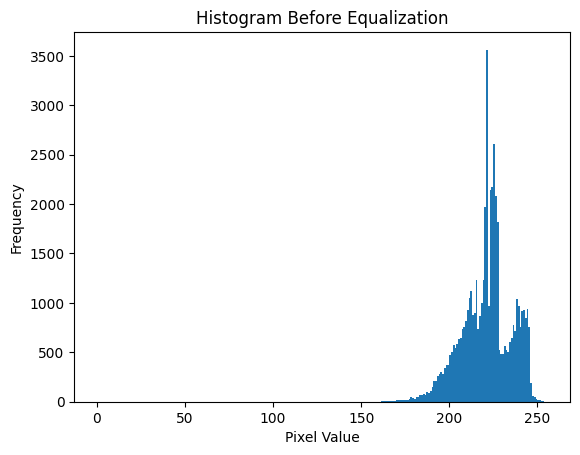

In [ ]:
# Load a low-contrast image
low_contrast_img = cv2.imread("/content/Low Contrast 1.jpeg", cv2.IMREAD_GRAYSCALE)

# Display original histogram
plt.hist(low_contrast_img.ravel(), 256, [0, 256])
plt.title("Histogram Before Equalization")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


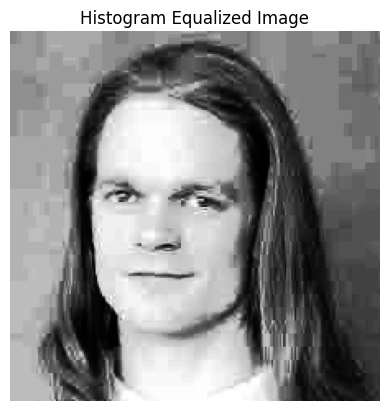

<ipython-input-9-78d45ffc93ed>:11: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_img.ravel(), 256, [0, 256])


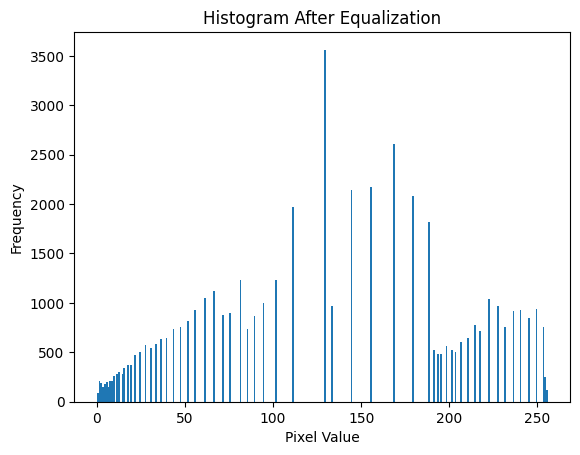

In [ ]:
# Apply Histogram Equalization
equalized_img = cv2.equalizeHist(low_contrast_img)

# Display equalized image
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")
plt.show()

# Display histogram after equalization
plt.hist(equalized_img.ravel(), 256, [0, 256])
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


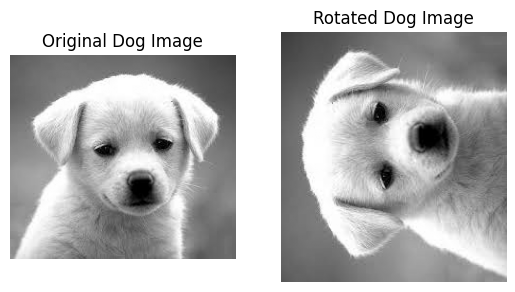

In [ ]:
# Load images
dog1 = cv2.imread("Dog.jpeg", cv2.IMREAD_GRAYSCALE)
dog2 = cv2.imread("DogLeftRotated.jpeg", cv2.IMREAD_GRAYSCALE)

# Display images
plt.subplot(1, 2, 1)
plt.imshow(dog1, cmap='gray')
plt.title("Original Dog Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dog2, cmap='gray')
plt.title("Rotated Dog Image")
plt.axis("off")

plt.show()


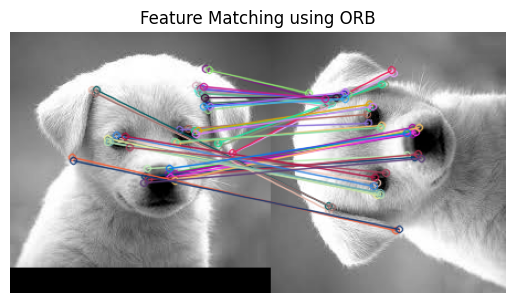

In [ ]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
keypoints1, descriptors1 = orb.detectAndCompute(dog1, None)
keypoints2, descriptors2 = orb.detectAndCompute(dog2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)  # Sort by distance

# Draw matched keypoints
matched_img = cv2.drawMatches(dog1, keypoints1, dog2, keypoints2, matches[:50], None, flags=2)

# Display matched features
plt.imshow(matched_img)
plt.title("Feature Matching using ORB")
plt.axis("off")
plt.show()
